#### p.219~228 시계열

In [4]:
import pandas as pd
import numpy as np

In [1]:
import datetime as dt

In [2]:
day = dt.datetime(2025,7,30)
day

datetime.datetime(2025, 7, 30, 0, 0)

In [3]:
dt.datetime.strptime('2025-07-30', "%Y-%m-%d")

datetime.datetime(2025, 7, 30, 0, 0)

In [ ]:
today = dt.datetime(2025,7,30)
today + dt.timedelta(4) # dt.timedelta(날짜) : 특정날짜 이후의 날을 출력해줌

datetime.datetime(2025, 8, 3, 0, 0)

In [10]:
#Monday == 1 / Sunday == 7
day.isoweekday()

3

In [11]:
#Monday == 0 / Sunday == 6
day.weekday()

2

In [ ]:
day = np.array('2025-07-30',dtype=np.datetime64) #datetime64 라는 데이터 타입  : 일자와 시간을 표기하는 타입 
day

array('2025-07-30', dtype='datetime64[D]')

In [13]:
np.datetime64('2025-07-30') + np.arange(10)

array(['2025-07-30', '2025-07-31', '2025-08-01', '2025-08-02',
       '2025-08-03', '2025-08-04', '2025-08-05', '2025-08-06',
       '2025-08-07', '2025-08-08'], dtype='datetime64[D]')

#### p.234 예제

In [40]:
bycycle_url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/refs/heads/main/FremontBridge.csv'
bycycle_df = pd.read_csv(bycycle_url)
bycycle_df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [34]:
pd.to_datetime(bycycle_df['Date'])

C:\Users\user\AppData\Local\Temp\ipykernel_9456\104974163.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(bycycle_df['Date'])


KeyboardInterrupt: 

In [ ]:
bycycle_df['Date'] = pd.to_datetime(bycycle_df['Date'], format="%m/%d/%Y %H:%M:%S %p") 
# pd.to_datetime() : 문자열을 날짜타입(datetime64 타입)으로 변환
# format으로 날짜/시간의 정확한 구조를 Pandas에게 알려줌 -> 이 형식에 맞춰서 데이터를 파싱(parsing)하므로 시간이 단축됨

In [ ]:
bycycle_df= bycycle_df.sort_values(['Date']) # 시간순으로 정렬

In [ ]:
bycycle_df = bycycle_df.set_index(['Date']) # 날짜를 인덱스로 설정

In [45]:
bycycle_df.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 01:00:00,90.0,42.0,48.0
2012-10-03 01:00:00,90.0,42.0,48.0
2012-10-03 02:00:00,128.0,77.0,51.0


In [ ]:
bycycle_df.index.is_monotonic_increasing # 데이터가 순서대로 잘 정렬되어 있는지 확인

True

In [60]:
import yfinance as yf
ticker = 'TSLA'

df = yf.download(ticker, start='2023-01-01', end='2025-07-30')
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_9456\3476225628.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2023-01-01', end='2025-07-30')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000


In [61]:
df.loc[:,('Close','TSLA')]

Date
2023-01-03    108.099998
2023-01-04    113.639999
2023-01-05    110.339996
2023-01-06    113.059998
2023-01-09    119.769997
                 ...    
2025-07-23    332.559998
2025-07-24    305.299988
2025-07-25    316.059998
2025-07-28    325.589996
2025-07-29    321.200012
Name: (Close, TSLA), Length: 644, dtype: float64

In [62]:
tsla_df = df.loc[:,('Close','TSLA')]

<Axes: xlabel='Date'>

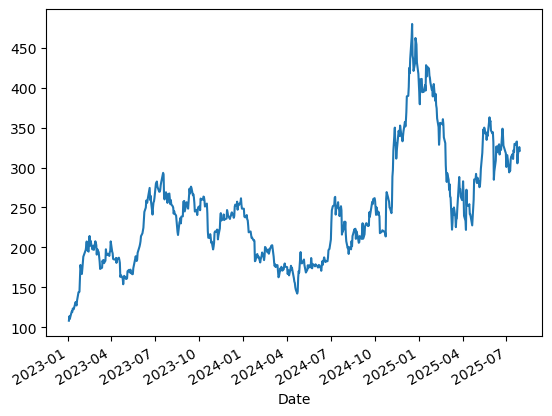

In [63]:
tsla_df.plot()

<Axes: xlabel='Date'>

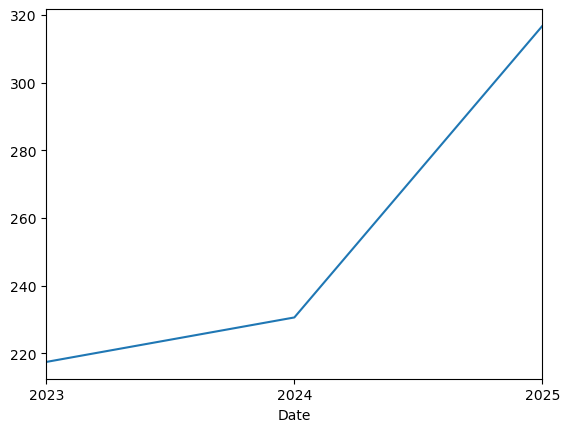

In [ ]:
tsla_df.resample("BYE").mean().plot() 
# .resample("BYE"): 연도별로 데이터 분류
# .mean() : 연평균 계산

C:\Users\user\AppData\Local\Temp\ipykernel_9456\346366983.py:1: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  tsla_df.asfreq('BA').plot()


<Axes: xlabel='Date'>

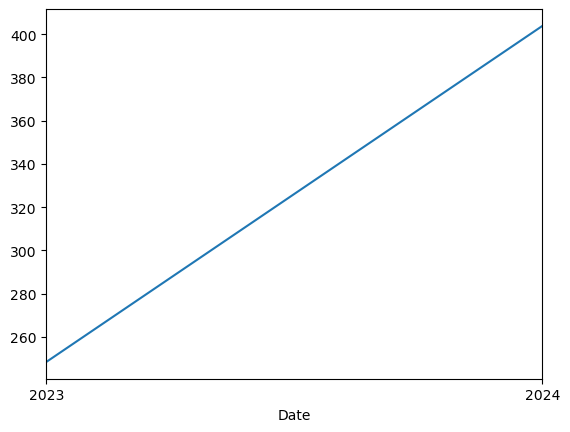

In [ ]:
tsla_df.asfreq('BA').plot()

# .asfreq(특정빈도) : 특정한 빈도로 데이터를 선택
# 'BA' : 각연도의 마지막날 값
# 'B' : 영업일만
# 'Q' : 각분기의 마지막날 값

<Axes: xlabel='Date'>

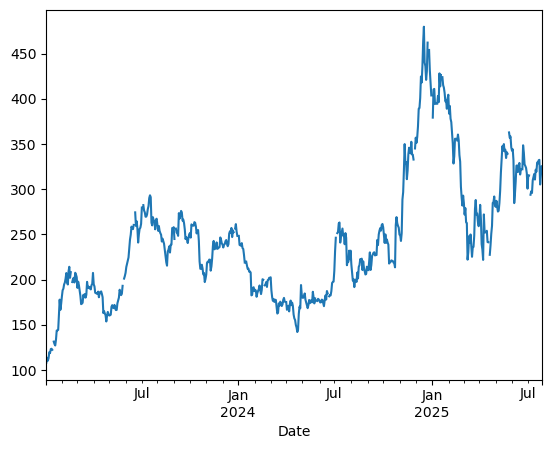

In [66]:
tsla_df.asfreq('B').plot()

C:\Users\user\AppData\Local\Temp\ipykernel_9456\2319359876.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  tsla_df.asfreq('Q').plot()


<Axes: xlabel='Date'>

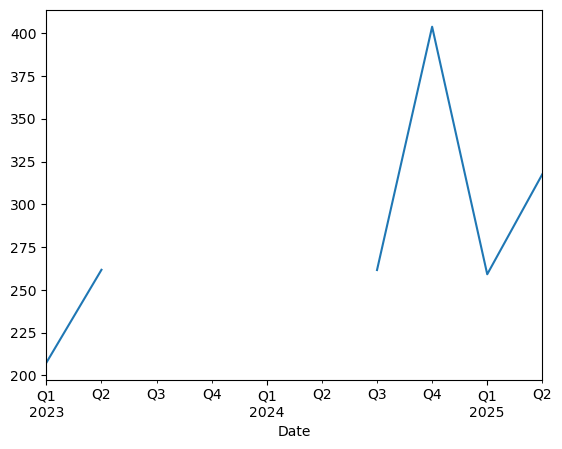

In [67]:
tsla_df.asfreq('Q').plot()

In [ ]:
tsla_df.shift(-365)
# shift : 데이터를 지정한 칸 수만큼 이동시키는 역할
# shift(-365) : 1년 뒤(365일) 미래의 데이터를 현재로 가져오는 효과

Date
2023-01-03    187.440002
2023-01-04    184.860001
2023-01-05    181.570007
2023-01-06    183.009995
2023-01-09    182.580002
                 ...    
2025-07-23           NaN
2025-07-24           NaN
2025-07-25           NaN
2025-07-28           NaN
2025-07-29           NaN
Name: (Close, TSLA), Length: 644, dtype: float64

<Axes: xlabel='Date'>

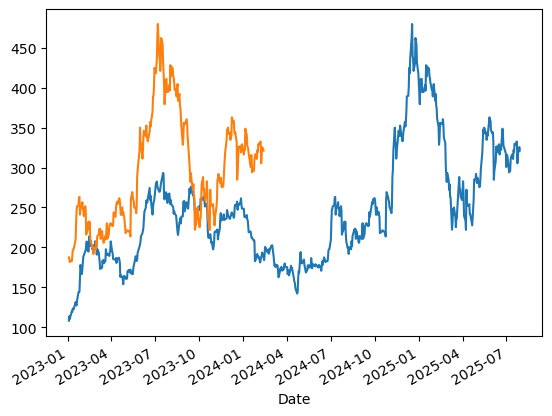

In [69]:
tsla_df.plot()
tsla_df.shift(-365).plot()

In [ ]:
tsla_df.rolling(5).mean()
# rolling() : 데이터를 ()안의 수만큼 묶음으로 만들기 >> 집계함수와 같이 사용함
# rolling(5).mean() : 5개씩 데이터를 묶어서 평균값을 계산

Date
2023-01-03           NaN
2023-01-04           NaN
2023-01-05           NaN
2023-01-06           NaN
2023-01-09    112.981998
                 ...    
2025-07-23    328.443994
2025-07-24    325.621991
2025-07-25    322.903992
2025-07-28    322.323993
2025-07-29    320.141998
Name: (Close, TSLA), Length: 644, dtype: float64

<Axes: xlabel='Date'>

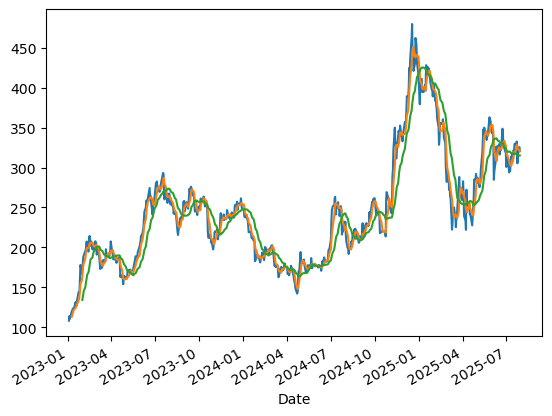

In [73]:
tsla_df.plot()
tsla_df.rolling(5).mean().plot()
tsla_df.rolling(20).mean().plot()